In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fsmodels import SklMultiExpFrequencyScan

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# sklearn-compatible class

https://scikit-learn.org/stable/developers/develop.html

https://scikit-learn.org/stable/glossary.html#glossary

In [2]:
frequency_powers = np.linspace(0, 3.5, 1000)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()

In [3]:
fs = SklMultiExpFrequencyScan(n_exps=3, filling_pulse=20*10**-6)

fs.exps_params_ = [[-1.0, 3.5],
                  [-2.3, 3.0],
                  [-3.5, 2.5]]

experimental_dlts = fs.predict(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

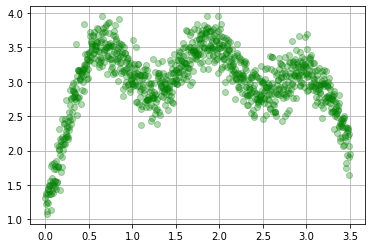

In [4]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [5]:
n_exps = 3

fs = SklMultiExpFrequencyScan(n_exps=n_exps, 
                           filling_pulse=2*10**-5,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=False
                          )

fs.fit(X=frequency_powers, y=experimental_dlts)

SklMultiExpFrequencyScan(filling_pulse=2e-05, n_exps=3, n_iters=200,
                         stop_val=1e-05)

In [6]:
fit_results = fs.fit_results_
fit_results

,n_exps,filling_pulse,loss,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2
0,3,0.00002,4.025852,-3.325976,1.000000,-1.894072,1.000000,-1.154387,1.000000
1,3,0.00002,3.441877,-3.251006,1.112096,-1.914292,1.146141,-1.162704,1.144306
2,3,0.00002,2.950049,-3.186201,1.221033,-1.937013,1.277412,-1.161879,1.276865
3,3,0.00002,2.539694,-3.133718,1.324971,-1.960217,1.395106,-1.152692,1.398961
4,3,0.00002,2.198626,-3.094333,1.422645,-1.982057,1.500646,-1.137266,1.511878
...,...,...,...,...,...,...,...,...,...
120,3,0.00002,0.037831,-3.480760,2.558334,-2.280284,2.961958,-0.994935,3.468743
121,3,0.00002,0.03782,-3.480941,2.557658,-2.280480,2.962462,-0.994970,3.469332
122,3,0.00002,0.037809,-3.481117,2.556994,-2.280671,2.962953,-0.995004,3.469900
123,3,0.00002,0.037799,-3.481287,2.556342,-2.280856,2.963431,-0.995037,3.470449


In [7]:
fs.exps_params_

array([[-3.48161107,  2.55506998],
       [-2.28121062,  2.96435056],
       [-0.99510082,  3.47148859]])

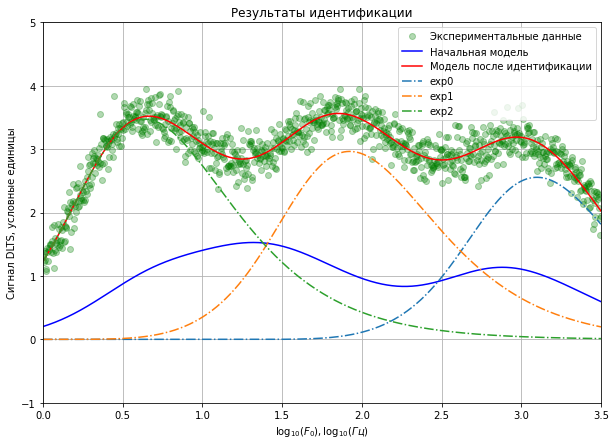

In [8]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    indices = frequency_powers.argsort()
    frequency_powers = frequency_powers[indices]
    experimental_dlts = experimental_dlts[indices]
    
    n_exps=fit_results.loc[0, 'n_exps']
    
    init_params = fit_results.iloc[0, :]
    init_params = [[init_params[f'time_constatn_power_{i}'], init_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs = SklMultiExpFrequencyScan(n_exps=n_exps, filling_pulse = fit_results.filling_pulse[0])
    fs.exps_params_ = init_params
    
    initial_model = fs.predict(frequency_powers)
    
    
    final_params = fit_results.iloc[-1, :]
    final_params = [[final_params[f'time_constatn_power_{i}'], final_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs.exps_params_=final_params
    final_model = fs.predict(frequency_powers)
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '-b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '-r', label='Модель после идентификации')

    for i, scan in enumerate(fs._fs_list):
        plt.plot(frequency_powers, scan(frequency_powers), '-.', label=f'exp{i}')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax



fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

In [9]:
fs.get_params()

{'filling_pulse': 2e-05,
 'learning_rate': 0.1,
 'n_exps': 3,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [10]:
fs.set_params(n_exps=4)

SklMultiExpFrequencyScan(filling_pulse=2e-05, n_exps=4, n_iters=200,
                         stop_val=1e-05)

In [11]:
fs.get_params()

{'filling_pulse': 2e-05,
 'learning_rate': 0.1,
 'n_exps': 4,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [12]:
fs.score(X=frequency_powers, y=experimental_dlts)

0.8528699234273439

In [13]:
fs.predict(X=frequency_powers)

array([1.23060313, 1.24461071, 1.2587104 , 1.2729015 , 1.28718329,
       1.30155499, 1.31601582, 1.33056494, 1.34520147, 1.35992451,
       1.37473311, 1.3896263 , 1.40460304, 1.4196623 , 1.43480296,
       1.45002391, 1.46532397, 1.48070192, 1.49615654, 1.51168653,
       1.52729056, 1.54296729, 1.55871531, 1.57453318, 1.59041944,
       1.60637257, 1.62239101, 1.63847319, 1.65461748, 1.67082222,
       1.6870857 , 1.7034062 , 1.71978195, 1.73621113, 1.75269191,
       1.7692224 , 1.7858007 , 1.80242486, 1.8190929 , 1.83580281,
       1.85255253, 1.86934   , 1.88616309, 1.90301968, 1.91990758,
       1.9368246 , 1.9537685 , 1.97073703, 1.9877279 , 2.0047388 ,
       2.02176739, 2.03881129, 2.05586813, 2.07293549, 2.09001093,
       2.10709199, 2.1241762 , 2.14126105, 2.15834404, 2.17542261,
       2.19249422, 2.2095563 , 2.22660626, 2.2436415 , 2.26065941,
       2.27765736, 2.29463272, 2.31158284, 2.32850507, 2.34539674,
       2.36225519, 2.37907773, 2.39586169, 2.41260439, 2.42930

# K-fold Cross-Validation and hyperparameter tuning

In [14]:
X_train, X_test, y_train, y_test = train_test_split(frequency_powers, experimental_dlts, test_size=0.2)

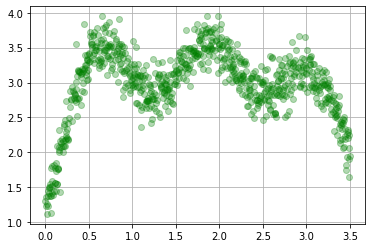

In [15]:
plt.plot(X_train, y_train, 'og', alpha=0.3)
plt.grid()
plt.show()

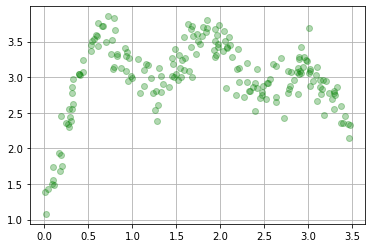

In [16]:
plt.plot(X_test, y_test, 'og', alpha=0.3)
plt.grid()
plt.show()

In [17]:
fs = SklMultiExpFrequencyScan(n_exps=2,
            filling_pulse=2*10**-5,
            n_iters=200,
            stop_val=10**-5,
            verbose=False
           )

fs.fit(X=X_train, y=y_train)

SklMultiExpFrequencyScan(filling_pulse=2e-05, n_exps=2, n_iters=200,
                         stop_val=1e-05)

In [18]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.80926111 0.79966691 0.80637863 0.89373601 0.85431962 0.8088138
 0.85644208 0.781408   0.87020964 0.75652981]
Mean: 0.8236765612832107
Standard deviation: 0.04084842234280586


In [19]:
fs.fit_results_

,n_exps,filling_pulse,loss,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1
0,2,0.00002,5.961075,-3.061423,1.000000,-2.584723,1.000000
1,2,0.00002,5.605649,-3.020605,1.103592,-2.505980,1.131953
2,2,0.00002,5.265567,-2.985855,1.201031,-2.417584,1.257684
3,2,0.00002,4.935495,-2.958567,1.293438,-2.321204,1.378656
4,2,0.00002,4.611548,-2.939245,1.382067,-2.218829,1.496159
...,...,...,...,...,...,...,...
96,2,0.00002,0.673362,-2.776514,3.713369,-1.137478,3.951295
97,2,0.00002,0.673348,-2.776608,3.714215,-1.137463,3.952099
98,2,0.00002,0.673336,-2.776696,3.715015,-1.137448,3.952860
99,2,0.00002,0.673326,-2.776780,3.715771,-1.137434,3.953581


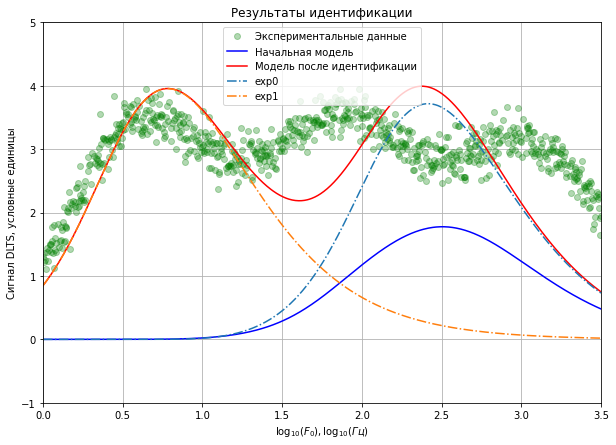

In [20]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

In [21]:
fs = SklMultiExpFrequencyScan(n_exps=5,
            filling_pulse=2*10**-5,
            n_iters=200,
            stop_val=10**-5,
            verbose=False
           )

fs.fit(X=X_train, y=y_train)

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.17408709 0.18602294 0.22535663 0.22987647 0.20407085 0.18264595
 0.20047161 0.18725516 0.19149333 0.24746838]
Mean: 0.20287484118995658
Standard deviation: 0.022640121010098848


In [22]:
grid_search = GridSearchCV(fs, {'n_exps':[2,3,4,5]}, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SklMultiExpFrequencyScan(filling_pulse=2e-05, n_exps=5,
                                                n_iters=200, stop_val=1e-05),
             n_jobs=-1, param_grid={'n_exps': [2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'n_exps': 3}

In [25]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.17092437 0.18526397 0.21820666 0.21818268 0.20348721 0.18226162
 0.19061673 0.18632362 0.19236121 0.20499541]
Mean: 0.19526234702849982
Standard deviation: 0.01478305401254172


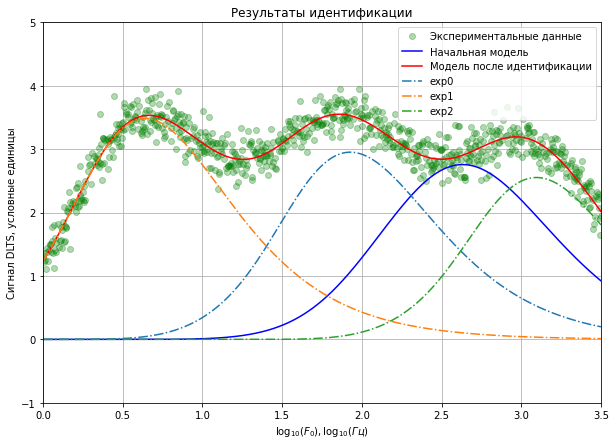

In [26]:
fit_results = grid_search.best_estimator_.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

In [27]:
mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

0.19623337848256636